In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

# Data Creation for Task 1 and Task 2

In [2]:

input_values = [
        [ 0, 0 ],
        [ 0, 1 ],
        [ 1, 0 ],
        [ 1, 1 ]
]
nor_output = [ [1], [0], [0], [0] ]
nand_output = [ [1], [1], [1], [0]]
xor_output = [ [0], [1], [1], [0]]
xnor_output = [ [1], [0], [0], [1] ]



# nand_augment = [
#     [0, 0, 1],
#     [1, 0, -1],
#     [0, 1, -1],
#     [1, 1, -1],
# ]



# Data Preprocessing Task 3

In [3]:
def augmentvectorgen(inputval, outputval):
    dataset = []
    for i in range(len(inputval)):
        dataset.append(inputval[i] + [-1])
        if(outputval[i][0] == 0):
            dataset[i][0] *= -1
            dataset[i][1] *= -1
            dataset[i][2] *= -1
    return dataset

nor_augment = augmentvectorgen(input_values, nor_output)
nand_augment = augmentvectorgen(input_values, nand_output)
xor_augment = augmentvectorgen(input_values, xor_output)
xnor_augment = augmentvectorgen(input_values, xnor_output)


# Perceptron Training algorithm implementation Task 4

In [4]:
def helper(augvec, wt):
    for vec in augvec:
        val = vec[0]*wt[0] +vec[1]*wt[1] + vec[2]*wt[2]
        if val <= 0:
            return vec, False

    return None, True

def perceptronAlgorithm(augvector):
    wt = [0, 0, 0]
    while True:
        vec, condn = helper(augvector, wt)
        if condn:
            return wt
        else:
            for i in range(len(wt)):
                wt[i] += vec[i]

    return wt

nor_wt = perceptronAlgorithm(nor_augment)
nand_wt = perceptronAlgorithm(nand_augment)
nor_wt = np.array(nor_wt)
nand_wt = np.array(nand_wt)
# np.ndarray((2,), buffer=nor_wt)
# ...
# offset=np.int_().itemsize,
# ...
# dtype=int)
# print(nor_wt)
# xor_wt = perceptronAlgorithm(xor_augment)
# xnor_wt = perceptronAlgorithm(xnor_augment)

# Dicision Boundary of NAND and NOR Task 5

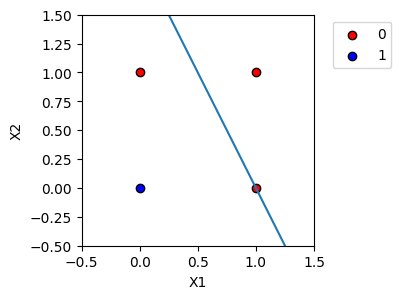

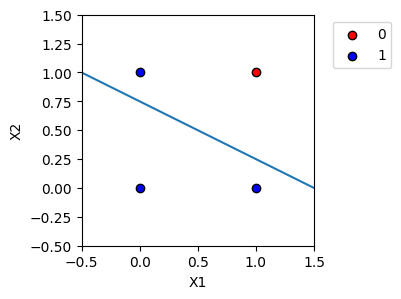

In [5]:
input_values = np.array(input_values)
nor_output = np.array(nor_output)
nand_output = np.array(nand_output)
plot_decision_boundary(input_values, nor_output, nor_wt)
plot_decision_boundary(input_values, nand_output, nand_wt)

In [ ]:
xor_wt = np.array(perceptronAlgorithm(xor_augment))
xnor_wt = np.array(perceptronAlgorithm(xnor_augment))
xor_output = np.array(xor_output)
xnor_output = np.array(xnor_output)
plot_decision_boundary(input_values, xor_output, xor_wt)
plot_decision_boundary(input_values, xnor_output, xnor_wt)

In [ ]:
def sigmoidfunc(a):
    return (1 / (1 + np.exp(-a)))

def helpersigmoid(augvec, wt):
    for vec in augvec:
        val = vec[0]*wt[0] +vec[1]*wt[1] + vec[2]*wt[2]
        val = sigmoidfunc(val)
        if val < 0.1:
            return vec, False

    return None, True

def perceptronAlgorithmsigmoid(augvector):
    wt = [0, 0, 0]
    while True:
        vec, condn = helper(augvector, wt)
        if condn:
            return wt
        else:
            for i in range(len(wt)):
                wt[i] += vec[i]

    return wt

xor_wt = np.array(perceptronAlgorithmsigmoid(xor_augment))
xnor_wt = np.array(perceptronAlgorithmsigmoid(xnor_augment))

print(xor_wt)
print(xnor_wt)